In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import gmaps
import os
from config import gkey
from geopy.geocoders import Nominatim

In [2]:
heat_read = pd.read_csv('heat_df.csv')
rain_read = pd.read_csv('rain_df.csv')

In [3]:
#Locate null rows for heat events
heat_df = heat_read.rename(columns={'Unnamed: 0': 'City'})
null_rows = []
dupe_rows = []
for index, row in heat_df.iterrows():
    if row['1950'] == 0:
        null_rows.append(index)
        
null_rows

[3, 26, 84]

In [4]:
#check in csv to make sure they are actually null and not just missing one value
#remove null rows
for ind in null_rows:
    heat_df.drop([ind], inplace=True)

heat_df


,City,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Houston_avg,18.0,21.1,20.0,23.8,26.7,23.6,13.8,18.0,19.8,...,33.2,27.5,26.1,28.7,30.9,31.2,24.2,37.2,32.6,38.2
1,Navarre_avg,21.0,16.2,18.9,18.8,18.7,16.3,17.6,16.9,19.4,...,27.0,30.3,27.8,34.4,29.7,31.9,24.7,31.3,34.3,33.9
2,Vallejo_avg,19.2,12.8,14.3,17.7,22.2,16.2,17.2,19.9,15.2,...,26.3,20.9,22.0,27.3,22.3,24.9,22.9,25.3,27.8,26.1
4,Four Seasons_avg,23.6,21.1,20.3,20.5,18.0,19.7,20.5,19.0,16.3,...,26.5,24.8,23.4,19.4,21.7,25.7,20.3,29.2,30.8,29.4
5,Mapleton_avg,18.0,23.3,17.3,18.5,20.7,18.6,22.2,18.5,11.2,...,30.9,29.2,26.6,32.0,24.5,33.1,39.3,40.1,37.2,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Oak Valley_avg,22.5,17.0,20.3,16.6,16.8,14.7,17.0,14.5,14.6,...,22.1,24.1,26.3,32.6,29.4,25.4,32.6,28.2,29.6,26.7
96,Houston_avg,18.0,21.1,20.0,23.8,26.7,23.6,13.8,18.0,19.8,...,33.2,27.5,26.1,28.7,30.9,31.2,24.2,37.2,32.6,38.2
97,Wiscasset_avg,15.6,18.5,18.6,13.0,18.4,20.8,20.7,15.0,16.1,...,23.2,23.2,22.4,27.4,28.4,22.0,34.8,31.1,23.8,23.4
98,Rutledge_avg,20.7,15.9,16.9,17.5,16.7,14.1,18.0,14.5,15.3,...,23.5,25.1,25.6,32.4,29.2,24.5,33.3,30.3,29.0,27.9


In [5]:
#drop duplicates
heat_df.drop_duplicates(subset= ['City'], inplace=True)
heat_df

,City,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Houston_avg,18.0,21.1,20.0,23.8,26.7,23.6,13.8,18.0,19.8,...,33.2,27.5,26.1,28.7,30.9,31.2,24.2,37.2,32.6,38.2
1,Navarre_avg,21.0,16.2,18.9,18.8,18.7,16.3,17.6,16.9,19.4,...,27.0,30.3,27.8,34.4,29.7,31.9,24.7,31.3,34.3,33.9
2,Vallejo_avg,19.2,12.8,14.3,17.7,22.2,16.2,17.2,19.9,15.2,...,26.3,20.9,22.0,27.3,22.3,24.9,22.9,25.3,27.8,26.1
4,Four Seasons_avg,23.6,21.1,20.3,20.5,18.0,19.7,20.5,19.0,16.3,...,26.5,24.8,23.4,19.4,21.7,25.7,20.3,29.2,30.8,29.4
5,Mapleton_avg,18.0,23.3,17.3,18.5,20.7,18.6,22.2,18.5,11.2,...,30.9,29.2,26.6,32.0,24.5,33.1,39.3,40.1,37.2,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Lawrence_avg,24.8,20.1,19.0,22.4,17.2,18.9,19.6,16.5,15.9,...,26.3,23.0,24.9,17.3,24.3,24.2,18.9,26.1,31.3,28.3
95,Oak Valley_avg,22.5,17.0,20.3,16.6,16.8,14.7,17.0,14.5,14.6,...,22.1,24.1,26.3,32.6,29.4,25.4,32.6,28.2,29.6,26.7
97,Wiscasset_avg,15.6,18.5,18.6,13.0,18.4,20.8,20.7,15.0,16.1,...,23.2,23.2,22.4,27.4,28.4,22.0,34.8,31.1,23.8,23.4
98,Rutledge_avg,20.7,15.9,16.9,17.5,16.7,14.1,18.0,14.5,15.3,...,23.5,25.1,25.6,32.4,29.2,24.5,33.3,30.3,29.0,27.9


Text(0, 0.5, 'Extreme Heat Events (count)')

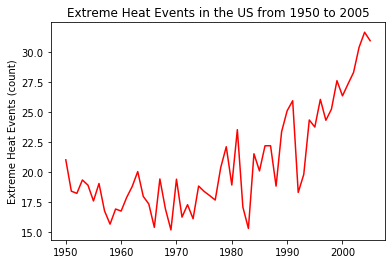

In [6]:
#create new data frame with heat averages by year to plot

years = list(range(1950, 2006))
averages = []
for year in years:
    averages.append(heat_df[str(year)].mean())
    
averages
usa_heat_dict = {'Year': years, 'Heat Events': averages}
usa_heat = pd.DataFrame(usa_heat_dict)
plt.plot(usa_heat['Year'], usa_heat['Heat Events'], color = 'red')
plt.title("Extreme Heat Events in the US from 1950 to 2005")
plt.ylabel("Extreme Heat Events (count)")

In [7]:
#Locate null rows for rain events
rain_df = rain_read.rename(columns={'Unnamed: 0': 'City'})
null_rows = []
for index, row in rain_df.iterrows():
    if row['1950'] == 0:
        null_rows.append(index)
        

In [8]:
#check in csv to make sure they are actually null and not just missing one value
#remove null rows
for ind in null_rows:
    rain_df.drop([ind], inplace=True)
    
rain_df

,City,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Houston_avg,8.2,9.7,8.5,9.0,8.4,9.0,12.0,8.7,8.1,...,9.0,10.9,10.1,8.7,10.3,10.1,9.7,6.8,9.2,7.2
1,Navarre_avg,8.8,10.6,9.5,10.4,11.7,9.9,10.7,11.4,10.2,...,11.3,11.9,9.9,9.0,10.5,13.7,11.3,10.7,12.7,10.0
2,Vallejo_avg,7.5,4.3,5.2,5.3,6.0,5.8,6.3,6.4,6.6,...,4.9,6.7,3.8,6.9,5.4,4.3,5.5,6.5,5.5,6.9
4,Four Seasons_avg,8.8,9.3,10.1,10.3,10.4,10.0,9.0,10.1,8.8,...,9.8,9.1,10.5,14.2,10.3,9.3,10.3,9.0,6.9,10.4
5,Mapleton_avg,9.2,8.1,8.3,8.1,9.9,8.7,7.4,8.0,8.7,...,9.0,11.9,8.5,11.3,11.1,8.9,6.6,8.6,9.5,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Oak Valley_avg,8.8,11.7,9.1,9.9,10.0,9.9,9.0,12.0,10.4,...,12.1,10.1,11.4,11.1,10.3,10.2,8.6,11.4,10.5,13.4
96,Houston_avg,8.2,9.7,8.5,9.0,8.4,9.0,12.0,8.7,8.1,...,9.0,10.9,10.1,8.7,10.3,10.1,9.7,6.8,9.2,7.2
97,Wiscasset_avg,12.2,12.5,8.5,12.0,12.3,11.8,12.3,12.6,10.5,...,13.9,11.3,14.2,12.8,12.4,13.2,10.0,14.0,12.4,18.0
98,Rutledge_avg,10.2,12.2,10.3,10.7,10.8,10.3,9.9,12.5,10.4,...,12.1,11.1,12.6,12.3,12.2,10.4,9.3,13.3,10.6,13.6


In [9]:
#drop duplicates
rain_df.drop_duplicates(subset= ['City'], inplace=True)
rain_df

,City,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Houston_avg,8.2,9.7,8.5,9.0,8.4,9.0,12.0,8.7,8.1,...,9.0,10.9,10.1,8.7,10.3,10.1,9.7,6.8,9.2,7.2
1,Navarre_avg,8.8,10.6,9.5,10.4,11.7,9.9,10.7,11.4,10.2,...,11.3,11.9,9.9,9.0,10.5,13.7,11.3,10.7,12.7,10.0
2,Vallejo_avg,7.5,4.3,5.2,5.3,6.0,5.8,6.3,6.4,6.6,...,4.9,6.7,3.8,6.9,5.4,4.3,5.5,6.5,5.5,6.9
4,Four Seasons_avg,8.8,9.3,10.1,10.3,10.4,10.0,9.0,10.1,8.8,...,9.8,9.1,10.5,14.2,10.3,9.3,10.3,9.0,6.9,10.4
5,Mapleton_avg,9.2,8.1,8.3,8.1,9.9,8.7,7.4,8.0,8.7,...,9.0,11.9,8.5,11.3,11.1,8.9,6.6,8.6,9.5,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Lawrence_avg,9.7,9.4,8.9,8.4,9.5,7.1,8.5,10.0,9.2,...,10.8,8.2,11.4,10.6,7.9,7.4,10.0,9.6,7.7,9.4
95,Oak Valley_avg,8.8,11.7,9.1,9.9,10.0,9.9,9.0,12.0,10.4,...,12.1,10.1,11.4,11.1,10.3,10.2,8.6,11.4,10.5,13.4
97,Wiscasset_avg,12.2,12.5,8.5,12.0,12.3,11.8,12.3,12.6,10.5,...,13.9,11.3,14.2,12.8,12.4,13.2,10.0,14.0,12.4,18.0
98,Rutledge_avg,10.2,12.2,10.3,10.7,10.8,10.3,9.9,12.5,10.4,...,12.1,11.1,12.6,12.3,12.2,10.4,9.3,13.3,10.6,13.6


Text(0, 0.5, 'Extreme Precipitation Evetns (count)')

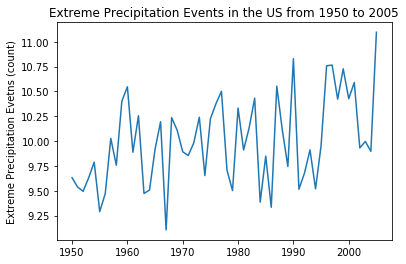

In [10]:
#create new dataframe with rain averages by year for plot

rain_averages = []
for year in years:
    rain_averages.append(rain_df[str(year)].mean())
usa_rain_dict = {'Year': years, 'Rain Events': rain_averages} 
usa_rain = pd.DataFrame(usa_rain_dict)
plt.plot(usa_rain['Year'], usa_rain['Rain Events'])
plt.title("Extreme Precipitation Events in the US from 1950 to 2005")
plt.ylabel("Extreme Precipitation Evetns (count)")

In [11]:
##MAP
#API gave incorrect coordinates, so found a csv with coordinates of us cities which I will use to get coordinates for my cities
#the climate api uses roughly top 2000 cities by population, and the csv has the top 30,000 also ranked by population. So I will
#drop the duplicates, keeping the first intance
cit_csv = pd.read_csv('uscities.csv')
cit_ref = pd.DataFrame(cit_csv)
cit_short = cit_ref.drop_duplicates(subset=['city'])

In [12]:
#creating a list of my cities to cross reference
cities = []
heat_df['City'] = heat_df['City'].str.replace('_avg', '')
for index, row in heat_df.iterrows():
    cities.append(row['City'])


In [13]:
#create lists of lat and lng values to be added to dataframe
lat = []
lng = []
for cit in cities:
    print(f'attempting to match {cit}')
    cit_match = cit_short[cit_short['city'] == cit]
    #.values will give me only the lat/lng value and leave out the index and dtype. this took way to long to figure out
    lat.append(cit_match['lat'].values)
    lng.append(cit_match['lng'].values)

attempting to match Houston
attempting to match Navarre
attempting to match Vallejo
attempting to match Four Seasons
attempting to match Mapleton
attempting to match Indianapolis
attempting to match Shreveport
attempting to match Polkton
attempting to match Ramsey
attempting to match Trenton
attempting to match De Pere
attempting to match Whiteville
attempting to match Denver
attempting to match West Wendover
attempting to match Bakersfield
attempting to match South Portland
attempting to match Owensboro
attempting to match Spring Grove
attempting to match Piedmont
attempting to match Jonesboro
attempting to match Metairie Terrace
attempting to match Falls Church
attempting to match Fort Smith
attempting to match Victoria
attempting to match Lewisville
attempting to match Grapevine
attempting to match New Lisbon
attempting to match La Grange
attempting to match Caroline
attempting to match Dunsmuir
attempting to match Fort Collins
attempting to match Clinton
attempting to match Braddoc

In [14]:
cit_match

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
3467,Rocky Point,Rocky Point,NY,New York,36103,Suffolk,40.9357,-72.9364,12902,440.0,polygon,False,False,America/New_York,3,11764 11961 11778,1840005070


In [15]:
# add them to the dataframe
heat_df['lat'] = lat
heat_df['lng'] = lng
heat_df

,City,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1998,1999,2000,2001,2002,2003,2004,2005,lat,lng
0,Houston,18.0,21.1,20.0,23.8,26.7,23.6,13.8,18.0,19.8,...,26.1,28.7,30.9,31.2,24.2,37.2,32.6,38.2,[29.7863],[-95.3889]
1,Navarre,21.0,16.2,18.9,18.8,18.7,16.3,17.6,16.9,19.4,...,27.8,34.4,29.7,31.9,24.7,31.3,34.3,33.9,[30.4174],[-86.8907]
2,Vallejo,19.2,12.8,14.3,17.7,22.2,16.2,17.2,19.9,15.2,...,22.0,27.3,22.3,24.9,22.9,25.3,27.8,26.1,[38.1133],[-122.2358]
4,Four Seasons,23.6,21.1,20.3,20.5,18.0,19.7,20.5,19.0,16.3,...,23.4,19.4,21.7,25.7,20.3,29.2,30.8,29.4,[],[]
5,Mapleton,18.0,23.3,17.3,18.5,20.7,18.6,22.2,18.5,11.2,...,26.6,32.0,24.5,33.1,39.3,40.1,37.2,33.0,[40.1188],[-111.5742]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Lawrence,24.8,20.1,19.0,22.4,17.2,18.9,19.6,16.5,15.9,...,24.9,17.3,24.3,24.2,18.9,26.1,31.3,28.3,[38.9597],[-95.2641]
95,Oak Valley,22.5,17.0,20.3,16.6,16.8,14.7,17.0,14.5,14.6,...,26.3,32.6,29.4,25.4,32.6,28.2,29.6,26.7,[39.8055],[-75.1589]
97,Wiscasset,15.6,18.5,18.6,13.0,18.4,20.8,20.7,15.0,16.1,...,22.4,27.4,28.4,22.0,34.8,31.1,23.8,23.4,[44.0115],[-69.6735]
98,Rutledge,20.7,15.9,16.9,17.5,16.7,14.1,18.0,14.5,15.3,...,25.6,32.4,29.2,24.5,33.3,30.3,29.0,27.9,[36.2757],[-83.5311]


In [24]:
#remove the brackets.
#heat_df['lng'] = heat_df['lng'].str[0]
heat_df

,City,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1998,1999,2000,2001,2002,2003,2004,2005,lat,lng
0,Houston,18.0,21.1,20.0,23.8,26.7,23.6,13.8,18.0,19.8,...,26.1,28.7,30.9,31.2,24.2,37.2,32.6,38.2,29.7863,-95.3889
1,Navarre,21.0,16.2,18.9,18.8,18.7,16.3,17.6,16.9,19.4,...,27.8,34.4,29.7,31.9,24.7,31.3,34.3,33.9,30.4174,-86.8907
2,Vallejo,19.2,12.8,14.3,17.7,22.2,16.2,17.2,19.9,15.2,...,22.0,27.3,22.3,24.9,22.9,25.3,27.8,26.1,38.1133,-122.2358
4,Four Seasons,23.6,21.1,20.3,20.5,18.0,19.7,20.5,19.0,16.3,...,23.4,19.4,21.7,25.7,20.3,29.2,30.8,29.4,NaN,NaN
5,Mapleton,18.0,23.3,17.3,18.5,20.7,18.6,22.2,18.5,11.2,...,26.6,32.0,24.5,33.1,39.3,40.1,37.2,33.0,40.1188,-111.5742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Lawrence,24.8,20.1,19.0,22.4,17.2,18.9,19.6,16.5,15.9,...,24.9,17.3,24.3,24.2,18.9,26.1,31.3,28.3,38.9597,-95.2641
95,Oak Valley,22.5,17.0,20.3,16.6,16.8,14.7,17.0,14.5,14.6,...,26.3,32.6,29.4,25.4,32.6,28.2,29.6,26.7,39.8055,-75.1589
97,Wiscasset,15.6,18.5,18.6,13.0,18.4,20.8,20.7,15.0,16.1,...,22.4,27.4,28.4,22.0,34.8,31.1,23.8,23.4,44.0115,-69.6735
98,Rutledge,20.7,15.9,16.9,17.5,16.7,14.1,18.0,14.5,15.3,...,25.6,32.4,29.2,24.5,33.3,30.3,29.0,27.9,36.2757,-83.5311


In [26]:
#drop cities without coordinates
heat_clean = heat_df.dropna()
heat_clean

,City,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1998,1999,2000,2001,2002,2003,2004,2005,lat,lng
0,Houston,18.0,21.1,20.0,23.8,26.7,23.6,13.8,18.0,19.8,...,26.1,28.7,30.9,31.2,24.2,37.2,32.6,38.2,29.7863,-95.3889
1,Navarre,21.0,16.2,18.9,18.8,18.7,16.3,17.6,16.9,19.4,...,27.8,34.4,29.7,31.9,24.7,31.3,34.3,33.9,30.4174,-86.8907
2,Vallejo,19.2,12.8,14.3,17.7,22.2,16.2,17.2,19.9,15.2,...,22.0,27.3,22.3,24.9,22.9,25.3,27.8,26.1,38.1133,-122.2358
5,Mapleton,18.0,23.3,17.3,18.5,20.7,18.6,22.2,18.5,11.2,...,26.6,32.0,24.5,33.1,39.3,40.1,37.2,33.0,40.1188,-111.5742
6,Indianapolis,23.5,19.2,18.7,16.2,18.7,18.7,21.4,15.4,12.6,...,31.1,28.0,24.9,32.3,28.7,33.4,38.6,38.8,39.7771,-86.1458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Lawrence,24.8,20.1,19.0,22.4,17.2,18.9,19.6,16.5,15.9,...,24.9,17.3,24.3,24.2,18.9,26.1,31.3,28.3,38.9597,-95.2641
95,Oak Valley,22.5,17.0,20.3,16.6,16.8,14.7,17.0,14.5,14.6,...,26.3,32.6,29.4,25.4,32.6,28.2,29.6,26.7,39.8055,-75.1589
97,Wiscasset,15.6,18.5,18.6,13.0,18.4,20.8,20.7,15.0,16.1,...,22.4,27.4,28.4,22.0,34.8,31.1,23.8,23.4,44.0115,-69.6735
98,Rutledge,20.7,15.9,16.9,17.5,16.7,14.1,18.0,14.5,15.3,...,25.6,32.4,29.2,24.5,33.3,30.3,29.0,27.9,36.2757,-83.5311


In [27]:
#finally have a data frame with coordinates.
gmaps.configure(api_key=gkey)

In [30]:
locations = heat_clean[["lat", "lng"]]
# Add marker layer

city_layer = gmaps.symbol_layer(
    locations, 
    fill_color="green",
    stroke_color='navy',
)

    
# Display figure
new_fig = gmaps.figure()
new_fig.add_layer(city_layer)
new_fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Getting global emissions Data
emission_csv = pd.read_csv("historical_emission_copy.csv")
#Creating new heat df that matches available years for emissions data
heat_df_1990 = heat_df[['City', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005']]
heat_df_1990
#clean up emissions df
emission_df = pd.DataFrame(emission_csv)
emission_df_world = emission_df[emission_df['Country'] == 'World']
emission_df_world = emission_df_world[emission_df_world['Sector'] == 'Total including LUCF']
emission_df_world = emission_df_world[emission_df_world['Gas'] == 'All GHG']
emission_df_world = emission_df_world[['Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005']]
emission_df_world

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,World,34967.34,35125.44,34985.53,35079.63,35287.61,36012.63,36025.05,37342.5,36976.63,36810.09,37420.92,38379.96,39824.7,40678.67,42452.22,43354.52


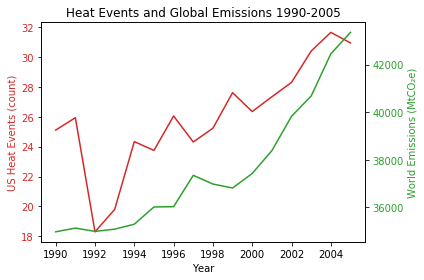

In [50]:
#create lists to capture heat and emissions data for set of years
years_1990 = list(range(1990, 2006))
heat_averages_1990 = []
emm_1990 = []
rain_averages_1990 = []
for year in years_1990:
    heat_averages_1990.append(heat_df[str(year)].mean())
    emm_1990.append(emission_df_world[str(year)].values)
    rain_averages_1990.append(rain_df[str(year)].mean())
#create dataframe with info incase I need it later
heat_averages_1990
heat_dict_1990 = {'Year': years_1990, 'Heat Events': heat_averages_1990, 'Emissions': emm_1990}
world_emm_heat = pd.DataFrame(heat_dict_1990)
#world_emm_heat['Emissions'] = world_emm_heat['Emissions'].str[0]
world_emm_heat

#plot both lines (had to look up matplotlib documentation)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('US Heat Events (count)', color=color)
ax1.plot(years_1990, heat_averages_1990, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:green'
ax2.set_ylabel('World Emissions (MtCO₂e)', color=color)  
ax2.plot(years_1990, emm_1990, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Heat Events and Global Emissions 1990-2005")
fig.tight_layout()  
plt.show()

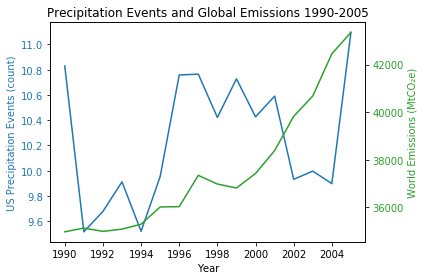

In [52]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('US Precipitation Events (count)', color=color)
ax1.plot(years_1990, rain_averages_1990, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:green'
ax2.set_ylabel('World Emissions (MtCO₂e)', color=color)  
ax2.plot(years_1990, emm_1990, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Precipitation Events and Global Emissions 1990-2005")
fig.tight_layout()  
plt.show()